### Zadanie 1

In [2]:
import cv2
import numpy as np
import matplotlib . pyplot as plt
# termination criteria
criteria = ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW
# inner size of chessboard
width = 9
height = 6
square_size = 0.025 # 0.025 meters
# prepare object points , like (0 ,0 ,0) , (1 ,0 ,0) , (2 ,0 ,0) .... ,(8 ,6 ,0)
objp = np . zeros (( height * width , 1, 3) , np . float64 )
objp [: , 0, :2] = np . mgrid [0: width , 0: height ]. T. reshape ( -1 , 2)
objp = objp * square_size # Create real world coords . Use your metric .
# Arrays to store object points and image points from all the images .
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane .
img_width = 640
img_height = 480
image_size = ( img_width , img_height )
path = ""
image_dir = path + "pairs/"
number_of_images = 50
for i in range (1 , number_of_images ):
    # read image
    img = cv2 . imread ( image_dir +"left_%02d.png"%i)
    gray = cv2 . cvtColor ( img , cv2 . COLOR_BGR2GRAY )
    # Find the chess board corners
    ret , corners = cv2 . findChessboardCorners ( gray , ( width , height ) , cv2 .
    CALIB_CB_ADAPTIVE_THRESH + cv2 . CALIB_CB_FAST_CHECK + cv2 .
    CALIB_CB_NORMALIZE_IMAGE )
    Y , X , channels = img . shape
    # skip images where the corners of the chessboard are too close to the edges of the image
    if ( ret == True ) :
        minRx = corners [: ,: ,0]. min ()
        maxRx = corners [: ,: ,0]. max ()
        minRy = corners [: ,: ,1]. min ()
        maxRy = corners [: ,: ,1]. max ()
        border_threshold_x = X /12
        border_threshold_y = Y /12
        x_thresh_bad = False
        if ( minRx < border_threshold_x ):
            x_thresh_bad = True
        y_thresh_bad = False
        if ( minRy < border_threshold_y ):
            y_thresh_bad = True
        if ( y_thresh_bad == True ) or ( x_thresh_bad == True ):
            continue
    # If found , add object points , image points ( after refining them )
    if ret == True :
        objpoints . append ( objp )
        # improving the location of points (sub - pixel )
        corners2 = cv2 . cornerSubPix ( gray , corners , (3 , 3) , ( -1 , -1) , criteria )
        imgpoints . append ( corners2 )
        # Draw and display the corners
        # Show the image to see if pattern is found ! imshow function .
        cv2 . drawChessboardCorners ( img , ( width , height ) , corners2 , ret )
        cv2 . imshow (" Corners ", img )
        cv2 . waitKey (20)
    else :
        print (" Chessboard couldn't detected . Image pair : ", i)
        continue
N_OK = len ( objpoints )
K = np . zeros ((3 , 3) )
D = np . zeros ((4 , 1) )
rvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
tvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
ret , K , D , _ , _ = cv2 . fisheye . calibrate (objpoints ,imgpoints ,image_size ,K ,D ,rvecs ,tvecs ,calibration_flags,( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6))
# Let ’s rectify our results
map1 , map2 = cv2 . fisheye . initUndistortRectifyMap (K , D , np . eye (3) , K , image_size ,
cv2 . CV_16SC2 )

cv2.waitKey()
cv2.destroyAllWindows()

 Chessboard couldn't detected . Image pair :  30


In [3]:
print(K)

[[335.39632033   0.         345.29507827]
 [  0.         335.22731983 232.92881023]
 [  0.           0.           1.        ]]


In [4]:

image = cv2 . imread ( image_dir +"left_%02d.png"%6)
image2 = cv2 . imread ( "red_lines.png")
undistorted_image = cv2 . remap ( image , map1 , map2 , interpolation = cv2 . INTER_LINEAR ,borderMode = cv2 . BORDER_CONSTANT )
cv2 . imshow (" Corners ", undistorted_image )
cv2.waitKey()
cv2 . imshow (" Corners ", image2 )
cv2.waitKey()
cv2.destroyAllWindows()

### Zadanie 2

In [11]:
import cv2
import numpy as np
import matplotlib . pyplot as plt
# termination criteria
criteria = ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW
# inner size of chessboard
width = 9
height = 6
square_size = 0.025 # 0.025 meters
# prepare object points , like (0 ,0 ,0) , (1 ,0 ,0) , (2 ,0 ,0) .... ,(8 ,6 ,0)
objp = np . zeros (( height * width , 1, 3) , np . float64 )
objp [: , 0, :2] = np . mgrid [0: width , 0: height ]. T. reshape ( -1 , 2)
objp = objp * square_size # Create real world coords . Use your metric .
# Arrays to store object points and image points from all the images .
objpoints = [] # 3d point in real world space
imgpointsLeft = [] # 2d points in image plane .
imgpointsRight = []
img_width = 640
img_height = 480
image_size = ( img_width , img_height )
path = ""
image_dir = path + "pairs/"
number_of_images = 50
for i in range (1 , number_of_images ):
    # read image
    img_left = cv2 . imread ( image_dir +"left_%02d.png"%i)
    img_right = cv2 . imread ( image_dir +"right_%02d.png"%i)
    gray_left = cv2 . cvtColor ( img_left , cv2 . COLOR_BGR2GRAY )
    gray_right = cv2 . cvtColor ( img_right , cv2 . COLOR_BGR2GRAY )
    # Find the chess board corners
    ret_left , corners_left = cv2 . findChessboardCorners ( gray_left , ( width , height ) , cv2 .CALIB_CB_ADAPTIVE_THRESH + cv2 . CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE )
    ret_right , corners_right = cv2 . findChessboardCorners ( gray_right , ( width , height ) , cv2 .CALIB_CB_ADAPTIVE_THRESH + cv2 . CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE )
    Y , X , channels = img_right . shape
    # skip images where the corners of the chessboard are too close to the edges of the image
    if ( ret == True ) :
        minRx_left = corners_left [: ,: ,0]. min ()
        maxRx_left = corners_left [: ,: ,0]. max ()
        minRy_left = corners_left [: ,: ,1]. min ()
        maxRy_left = corners_left [: ,: ,1]. max ()

        minRx_right = corners_right [: ,: ,0]. min ()
        maxRx_right = corners_right [: ,: ,0]. max ()
        minRy_right = corners_right [: ,: ,1]. min ()
        maxRy_right = corners_right [: ,: ,1]. max ()

        border_threshold_x = X /12
        border_threshold_y = Y /12
        x_thresh_bad = False
        if ( minRx_left < border_threshold_x ) or ( minRx_right < border_threshold_x ):
            x_thresh_bad = True
        y_thresh_bad = False
        if ( minRy_left < border_threshold_y ) or ( minRy_right < border_threshold_y ):
            y_thresh_bad = True
        if ( y_thresh_bad == True ) or ( x_thresh_bad == True ):
            continue
    # If found , add object points , image points ( after refining them )
    if ret_left == True and ret_right == True:
        objpoints . append ( objp )
        # improving the location of points (sub - pixel )
        corners2_left = cv2 . cornerSubPix ( gray_left , corners_left , (3 , 3) , ( -1 , -1) , criteria )
        corners2_right = cv2 . cornerSubPix ( gray_right , corners_right , (3 , 3) , ( -1 , -1) , criteria )
        imgpointsLeft . append ( corners2_left )
        imgpointsRight . append ( corners2_right )
        # Draw and display the corners
        # Show the image to see if pattern is found ! imshow function .
        cv2 . drawChessboardCorners ( img_left , ( width , height ) , corners2_left , ret_left )
        cv2 . imshow (" Corners ", img_left )
        cv2 . waitKey (20)
        cv2 . drawChessboardCorners ( img_right , ( width , height ) , corners2_right , ret_right )
        cv2 . imshow (" Corners ", img_right )
        cv2 . waitKey (20)
    else :
        print (" Chessboard couldn't detected . Image pair : ", i)
        continue
cv2.waitKey()
cv2.destroyAllWindows()

 Chessboard couldn't detected . Image pair :  30


In [12]:
print(len(objpoints))

48


In [13]:
N_OK = len ( objpoints )
K = np . zeros ((3 , 3) )
D = np . zeros ((4 , 1) )
rvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
tvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
ret_l , K_left , D_left , _ , _ = cv2 . fisheye . calibrate (objpoints ,imgpointsLeft ,image_size ,K ,D ,rvecs ,tvecs ,calibration_flags,( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6))
# Let ’s rectify our results
map1_left , map2_left = cv2 . fisheye . initUndistortRectifyMap (K , D , np . eye (3) , K , image_size ,cv2 . CV_16SC2 )


In [14]:
N_OK = len ( objpoints )
K = np . zeros ((3 , 3) )
D = np . zeros ((4 , 1) )
rvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
tvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
ret_r , K_right , D_right , _ , _ = cv2 . fisheye . calibrate (objpoints ,imgpointsRight ,image_size ,K ,D ,rvecs ,tvecs ,calibration_flags,( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6))
# Let ’s rectify our results
map1_right , map2_right = cv2 . fisheye . initUndistortRectifyMap (K , D , np . eye (3) , K , image_size ,cv2 . CV_16SC2 )


In [15]:
imgpointsLeft = np . asarray ( imgpointsLeft , dtype = np . float64 )
imgpointsRight = np . asarray ( imgpointsRight , dtype = np . float64 )
( RMS , _ , _ , _ , _ , rotationMatrix , translationVector ) = cv2 . fisheye . stereoCalibrate (objpoints , imgpointsLeft , imgpointsRight ,K_left , D_left , K_right , D_right ,image_size , None , None ,cv2 . CALIB_FIX_INTRINSIC ,( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.01) )
R2 = np . zeros ([3 ,3])
P1 = np . zeros ([3 ,4])
P2 = np . zeros ([3 ,4])
Q = np . zeros ([4 ,4])
# Rectify calibration results
( leftRectification , rightRectification , leftProjection , rightProjection ,dispartityToDepthMap ) = cv2 . fisheye . stereoRectify (K_left , D_left ,K_right , D_right ,image_size ,rotationMatrix , translationVector ,0, R2 , P1 , P2 , Q ,cv2 . CALIB_ZERO_DISPARITY , (0 ,0) , 0 , 0)
map1_left , map2_left = cv2 . fisheye . initUndistortRectifyMap (K_left , D_left , leftRectification ,leftProjection , image_size , cv2 . CV_16SC2 )
map1_right , map2_right = cv2 . fisheye . initUndistortRectifyMap (K_right , D_right , rightRectification ,rightProjection , image_size , cv2 . CV_16SC2 )

In [19]:
img_l = cv2 . imread ( image_dir +"left_%02d.png"%29)
img_r = cv2 . imread ( image_dir +"right_%02d.png"%29)

dst_L = cv2 . remap ( img_l , map1_left , map2_left , cv2 . INTER_LINEAR )
dst_R = cv2 . remap ( img_r , map1_right , map2_right , cv2 . INTER_LINEAR )

N , XX , YY = dst_L . shape [:: -1] # RGB image size
visRectify = np . zeros (( YY , XX *2 , N) , np . uint8 ) # create a new image with a new size
( height , 2* width )
visRectify [: ,0: XX : ,:] = dst_L # left image assignment
visRectify [: , XX : XX *2: ,:] = dst_R # right image assignment
# draw horizontal lines
for y in range (0 , YY ,10) :
    cv2 . line ( visRectify , (0 , y) , ( XX *2 , y) , (255 ,0 ,0) )
    cv2 . imshow ('visRectify', visRectify ) 
cv2.waitKey()
cv2.destroyAllWindows()

#### Zadanie 3

In [38]:
num = 29

In [49]:
stereo = cv2.StereoBM_create(numDisparities=80, blockSize=17)
img_r_new = cv2.imread(image_dir +"right_%02d.png"%num, 0)
img_l_new = cv2.imread(image_dir +"left_%02d.png"%num, 0)
disparity = stereo.compute(img_l_new, img_r_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_no_calib_BM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

In [50]:
stereo = cv2.StereoSGBM_create(minDisparity=16,numDisparities=80, blockSize=17)
img_r_new = cv2.imread(image_dir +"right_%02d.png"%num, 0)
img_l_new = cv2.imread(image_dir +"left_%02d.png"%num, 0)
disparity = stereo.compute(img_l_new, img_r_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_no_calib_SGBM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

In [51]:
stereo = cv2.StereoBM_create(numDisparities=80, blockSize=17)
img_r = cv2.imread(image_dir +"right_%02d.png"%num, 0)
img_l = cv2.imread(image_dir +"left_%02d.png"%num, 0)
img_l_new = cv2 . remap ( img_l , map1_left , map2_left , cv2 . INTER_LINEAR )
img_r_new = cv2 . remap ( img_r , map1_right , map2_right , cv2 . INTER_LINEAR )
disparity = stereo.compute(img_r_new, img_l_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_calib_BM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)


In [52]:
stereo = cv2.StereoSGBM_create(minDisparity=16,numDisparities=80, blockSize=17)
img_r = cv2.imread(image_dir +"right_%02d.png"%num, 0)
img_l = cv2.imread(image_dir +"left_%02d.png"%num, 0)
img_l_new = cv2 . remap ( img_l , map1_left , map2_left , cv2 . INTER_LINEAR )
img_r_new = cv2 . remap ( img_r , map1_right , map2_right , cv2 . INTER_LINEAR )
disparity = stereo.compute(img_r_new, img_l_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_calib_SGBM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

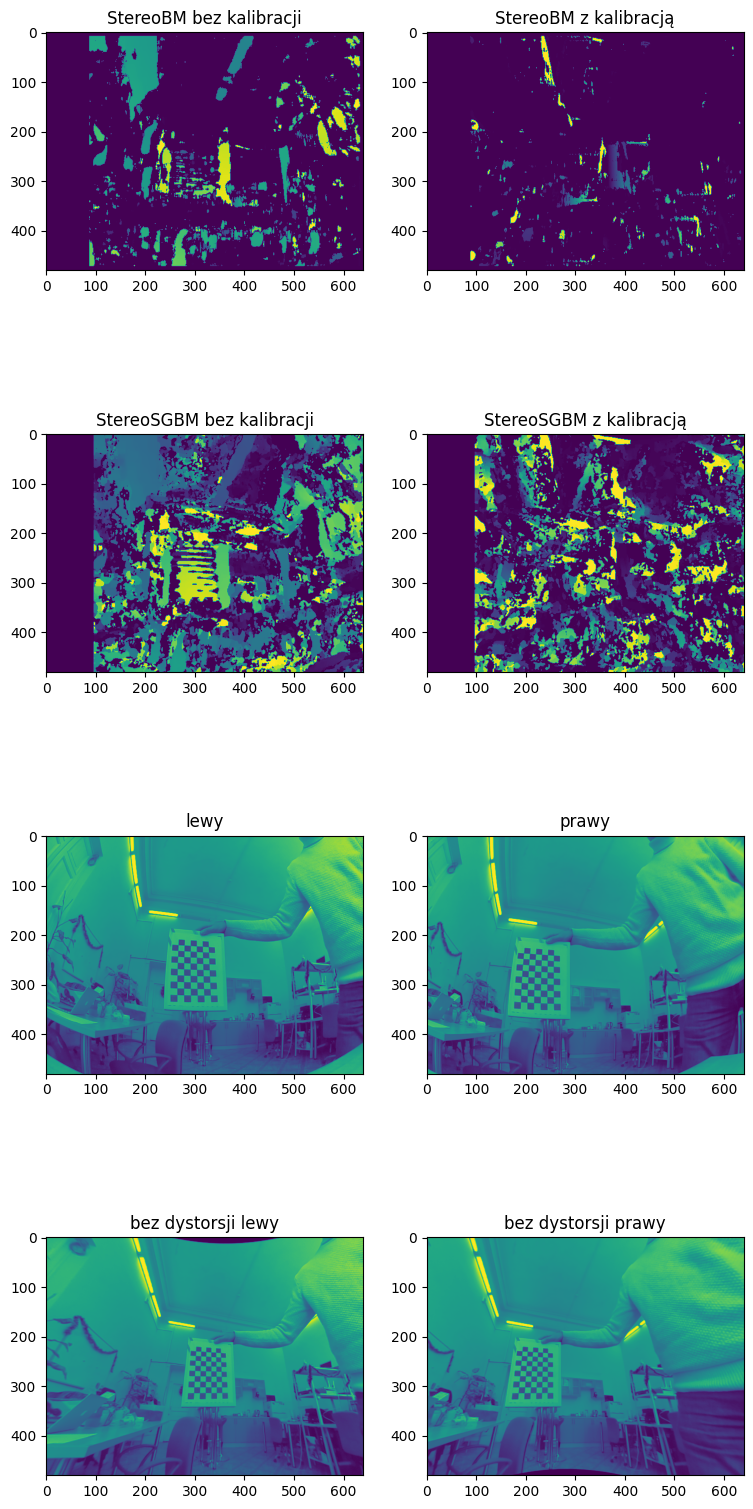

In [54]:
import matplotlib.pyplot as plt



plt.figure(figsize=(9, 20))
plt.subplot(421)
plt.title('StereoBM bez kalibracji')
plt.imshow(disparity_no_calib_BM)
plt.subplot(422)
plt.title('StereoBM z kalibracją')
plt.imshow(disparity_calib_BM)
plt.subplot(423)
plt.title('StereoSGBM bez kalibracji')
plt.imshow(disparity_no_calib_SGBM)
plt.subplot(424)
plt.title('StereoSGBM z kalibracją')
plt.imshow(disparity_calib_SGBM)
plt.subplot(425)
plt.title('lewy')
plt.imshow(img_l)
plt.subplot(426)
plt.title('prawy')
plt.imshow(img_r)
plt.subplot(427)
plt.title('bez dystorsji lewy')
plt.imshow(img_l_new)
plt.subplot(428)
plt.title('bez dystorsji prawy')
plt.imshow(img_r_new)
plt.show()